In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'matplotlib'

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('credit_risk_dataset.csv')

#### Mô tả dữ liệu

Dữ liệu ở file `credit_risk_dataset.csv` gồm các trường như sau:

|Trường thông tin|Ý nghĩa|
|---|----|
|person_age|Tuổi khách hàng|
|person_income|Thu nhập hàng năm|
|person_home_ownership|Quyền sở hữu nhà|
|person_emp_length|Số năm có việc làm|
|loan_intent|Mục đích khoản vay|
|loan_grade|Hạng khoản vay (A-G)|
|loan_amnt|Số tiền vay|
|loan_int_rate|Lãi suất vay|
|loan_status|Tình trạng khoản vay (vỡ nợ = 1)|
|loan_percent_income|Phần trăm khoản vay trên thu nhập|
|cb_person_default_on_file|Lịch sử vỡ nợ (Y/N)|
|cb_preson_cred_hist_length|Thời gian lịch sử tín dụng|

In [4]:
df.shape

(32581, 12)

In [5]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [5]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [3]:
df.duplicated().value_counts()

False    32416
True       165
dtype: int64

In [4]:
df.drop_duplicates(inplace = True)

In [5]:
cat_col=df.select_dtypes(include=["object"]).columns
num_col=df.select_dtypes(include=["int","float"]).columns

In [6]:
num_col = num_col.drop('loan_status')

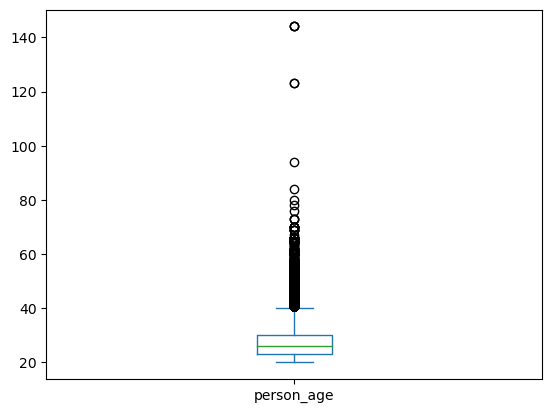

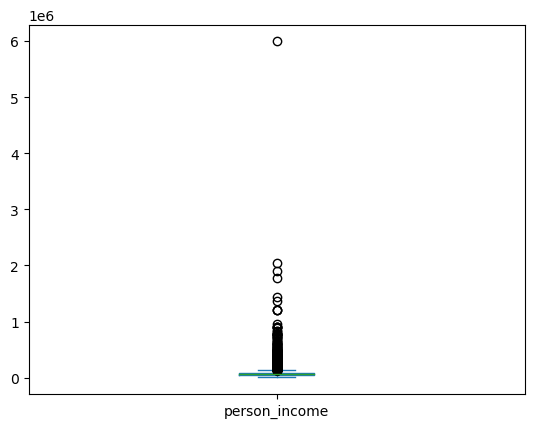

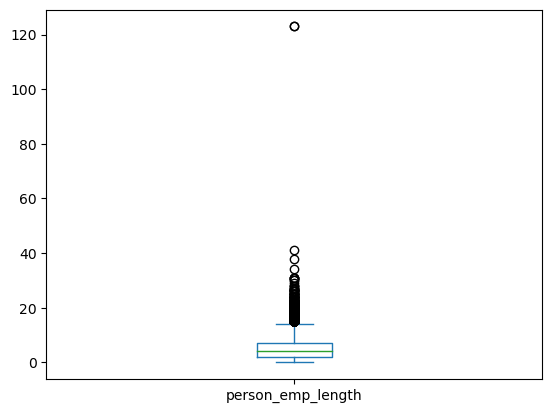

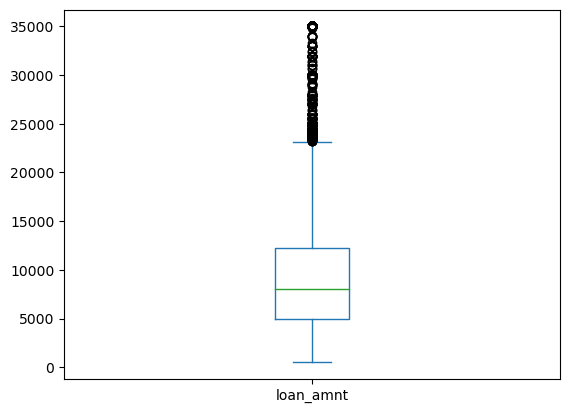

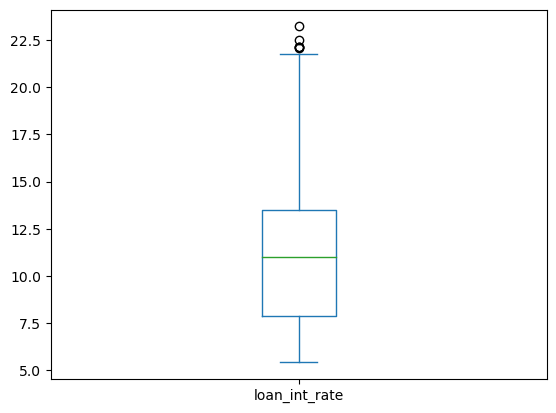

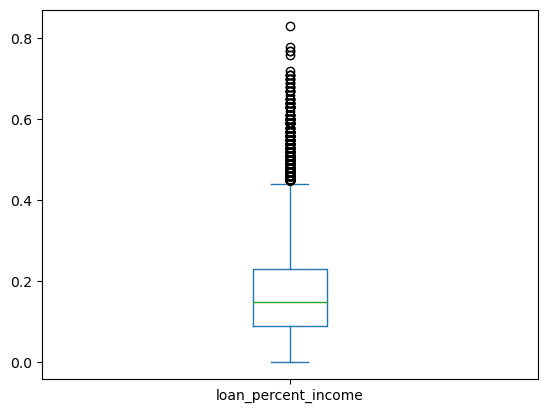

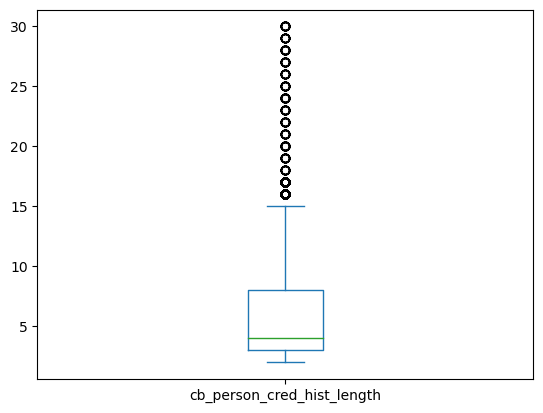

In [10]:
for col in num_col:
    df[col].plot(kind = 'box')
    plt.show()

In [11]:
df[df.person_income == df.person_income.max()]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
32297,144,6000000,MORTGAGE,12.0,PERSONAL,C,5000,12.73,0,0.0,N,25


In [7]:
df[df.person_emp_length == df.person_emp_length.max()]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
210,21,192000,MORTGAGE,123.0,VENTURE,A,20000,6.54,0,0.10,N,4


In [8]:
df = df[(df.person_age < 80) & (df.person_emp_length < 100)]
df = df[df.person_emp_length < (df.person_age - 14)]

In [9]:
df.shape

(31519, 12)

In [10]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length                0
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3026
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [27]:
df2 = df[df.loan_int_rate.isnull()]
df2

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
39,23,71500,RENT,3.0,DEBTCONSOLIDATION,D,30000,NaN,1,0.42,N,4
50,24,78000,RENT,4.0,DEBTCONSOLIDATION,D,30000,NaN,1,0.38,Y,4
57,23,277000,OWN,3.0,PERSONAL,A,35000,NaN,0,0.13,N,4
59,24,12000,OWN,2.0,VENTURE,E,1750,NaN,0,0.15,Y,3
62,26,263000,MORTGAGE,0.0,EDUCATION,B,10000,NaN,1,0.04,N,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32547,53,4888,OWN,0.0,VENTURE,C,1400,NaN,1,0.29,Y,28
32552,65,45900,RENT,2.0,EDUCATION,C,10000,NaN,0,0.22,Y,19
32553,54,20000,RENT,2.0,MEDICAL,C,5000,NaN,0,0.25,N,28
32569,51,60000,MORTGAGE,1.0,PERSONAL,A,7500,NaN,0,0.13,N,23


In [28]:
df.loc[39]

person_age                                   23
person_income                             71500
person_home_ownership                      RENT
person_emp_length                           3.0
loan_intent                   DEBTCONSOLIDATION
loan_grade                                    D
loan_amnt                                 30000
loan_int_rate                               NaN
loan_status                                   1
loan_percent_income                        0.42
cb_person_default_on_file                     N
cb_person_cred_hist_length                    4
Name: 39, dtype: object

In [31]:
df1 = df.groupby('loan_grade').agg({'loan_int_rate': 'mean'}).squeeze()
#hình như default mean đã không bao gồm na khi tính rồi

In [33]:
df1

loan_grade
A     7.347762
B    11.002630
C    13.454697
D    15.347909
E    17.004591
F    18.597321
G    20.251525
Name: loan_int_rate, dtype: float64

In [40]:
df1.get('A')

7.347761960826287

In [19]:
df2 = pd.DataFrame(np.zeros((4, 4)), columns=list("ABCE"))
df2

,A,B,C,E
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0


In [54]:
isna??

Object `isna` not found.


In [55]:
df.loc[df.loan_int_rate.isnull(), 'loan_int_rate']

39      NaN
50      NaN
57      NaN
59      NaN
62      NaN
         ..
32547   NaN
32552   NaN
32553   NaN
32569   NaN
32570   NaN
Name: loan_int_rate, Length: 3026, dtype: float64

In [57]:
df.loc[df.loan_int_rate.isnull(), 'loan_int_rate'] = df.apply(lambda row: df1.get(row['loan_grade']), axis = 1)

In [49]:
df2.loan_int_rate = df2.apply(lambda row: df1.get(row['loan_grade']), axis = 1)

C:\Users\HP\AppData\Local\Temp\ipykernel_12236\354861339.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loan_int_rate = df2.apply(lambda row: df1.get(row['loan_grade']), axis = 1)


In [50]:
df2

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
39,23,71500,RENT,3.0,DEBTCONSOLIDATION,D,30000,15.347909,1,0.42,N,4
50,24,78000,RENT,4.0,DEBTCONSOLIDATION,D,30000,15.347909,1,0.38,Y,4
57,23,277000,OWN,3.0,PERSONAL,A,35000,7.347762,0,0.13,N,4
59,24,12000,OWN,2.0,VENTURE,E,1750,17.004591,0,0.15,Y,3
62,26,263000,MORTGAGE,0.0,EDUCATION,B,10000,11.002630,1,0.04,N,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32547,53,4888,OWN,0.0,VENTURE,C,1400,13.454697,1,0.29,Y,28
32552,65,45900,RENT,2.0,EDUCATION,C,10000,13.454697,0,0.22,Y,19
32553,54,20000,RENT,2.0,MEDICAL,C,5000,13.454697,0,0.25,N,28
32569,51,60000,MORTGAGE,1.0,PERSONAL,A,7500,7.347762,0,0.13,N,23


In [58]:
df.loc[39]

person_age                                   23
person_income                             71500
person_home_ownership                      RENT
person_emp_length                           3.0
loan_intent                   DEBTCONSOLIDATION
loan_grade                                    D
loan_amnt                                 30000
loan_int_rate                         15.347909
loan_status                                   1
loan_percent_income                        0.42
cb_person_default_on_file                     N
cb_person_cred_hist_length                    4
Name: 39, dtype: object

In [13]:
df["loan_status"].value_counts(normalize = True)

0    0.784035
1    0.215965
Name: loan_status, dtype: float64

### Biến định tính

#### Phân tích đơn nhân tố

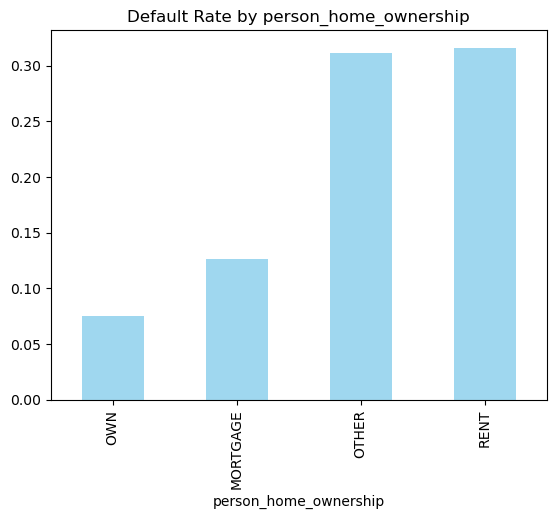

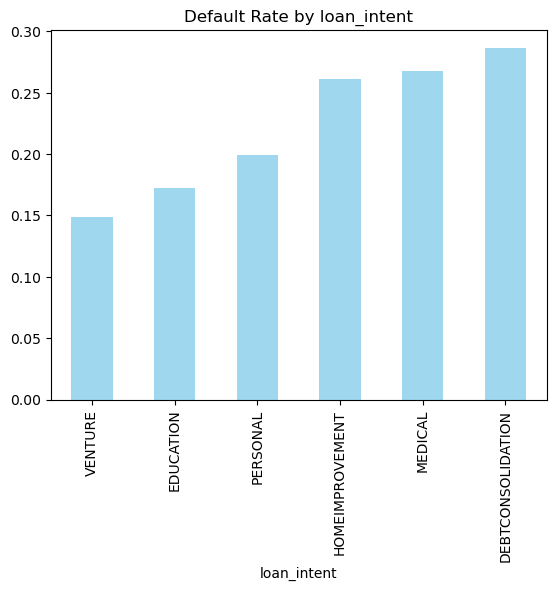

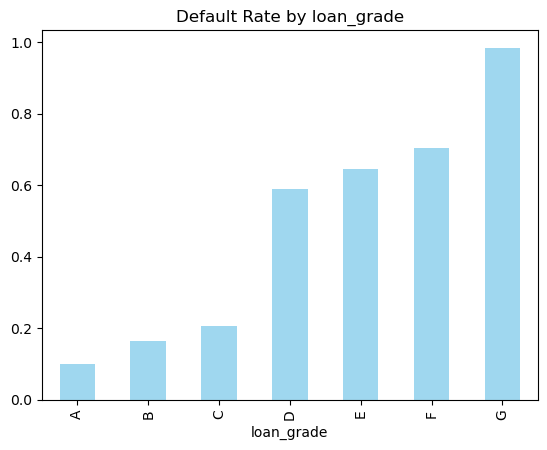

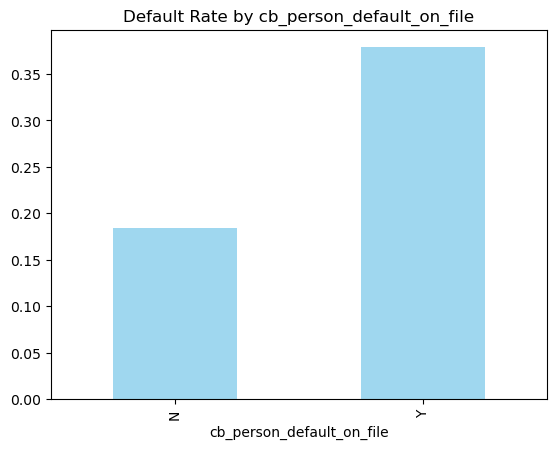

In [17]:
for col in cat_col:
    df.groupby(col).loan_status.mean().sort_values().plot(kind='bar', alpha =0.8, color='skyblue')
    plt.title(f"Default Rate by {col}")
    plt.show()

#### Phân tích đa nhân tố

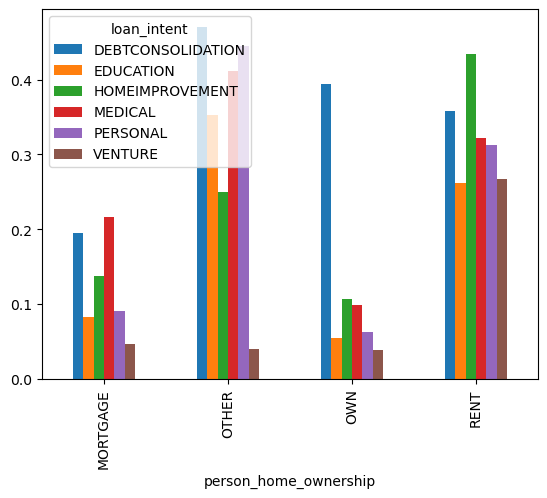

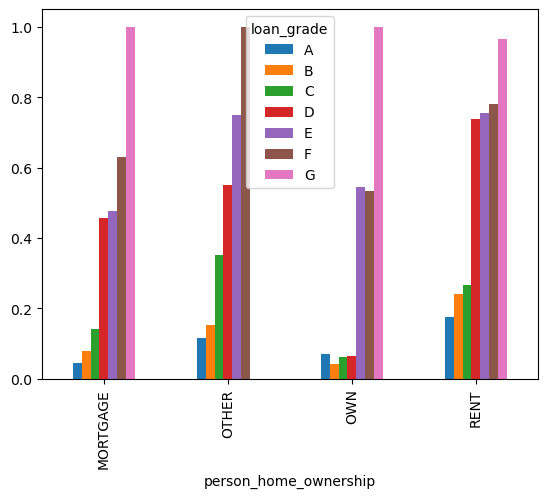

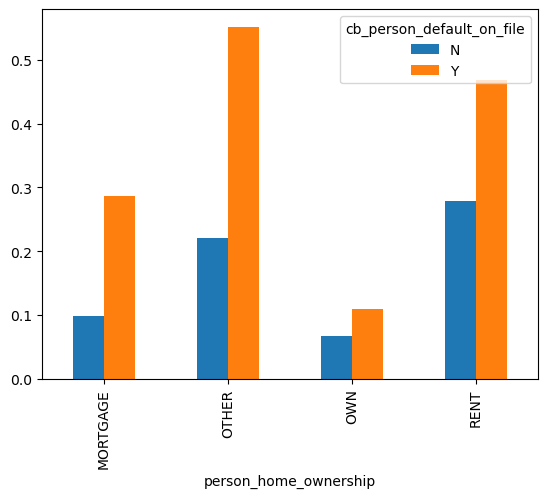

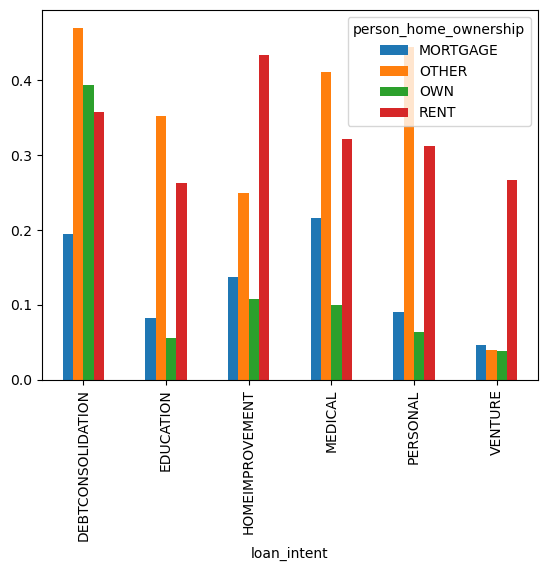

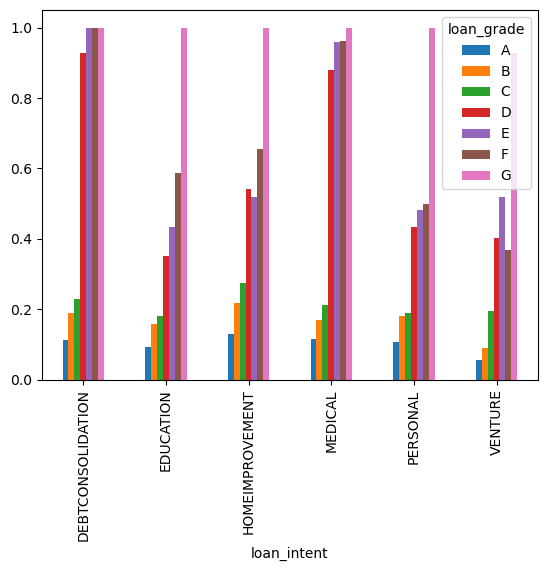

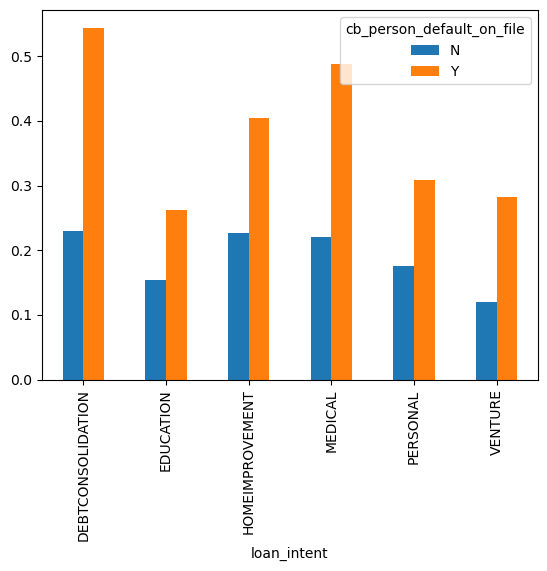

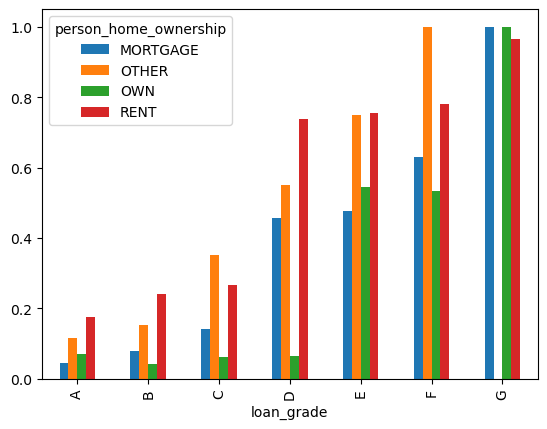

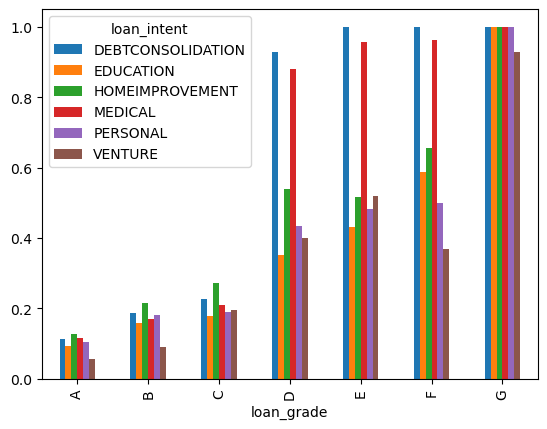

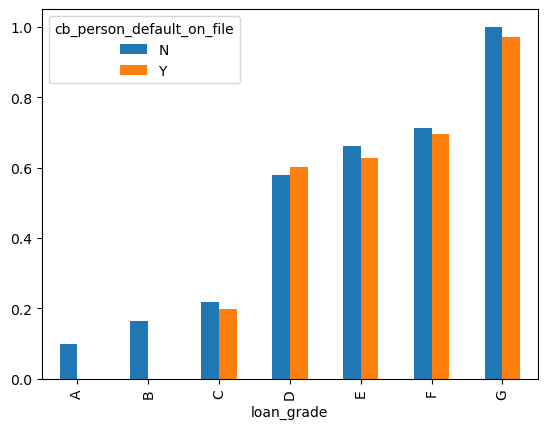

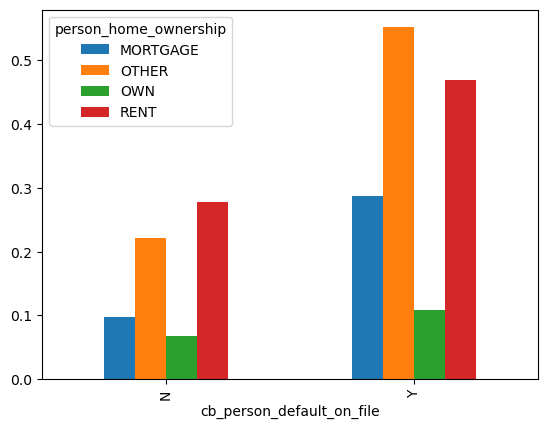

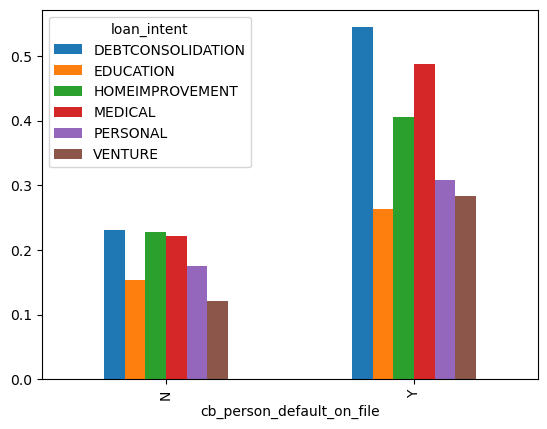

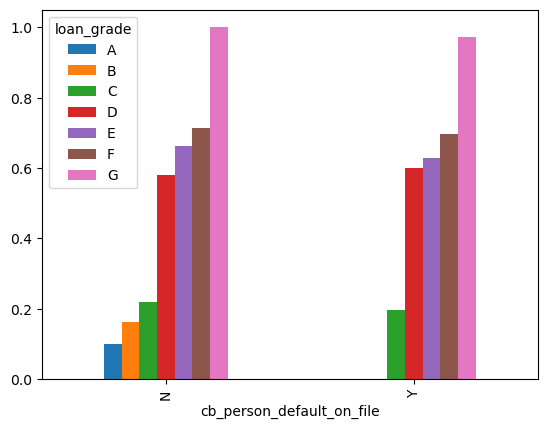

In [18]:
for i in cat_col:
    for j in cat_col:
        if i!= j:
            pd.pivot_table(df, index=i, columns = j, values ='loan_status', aggfunc='mean').plot(kind='bar')

### Biến định lượng

#### Phân tích đơn nhân tố

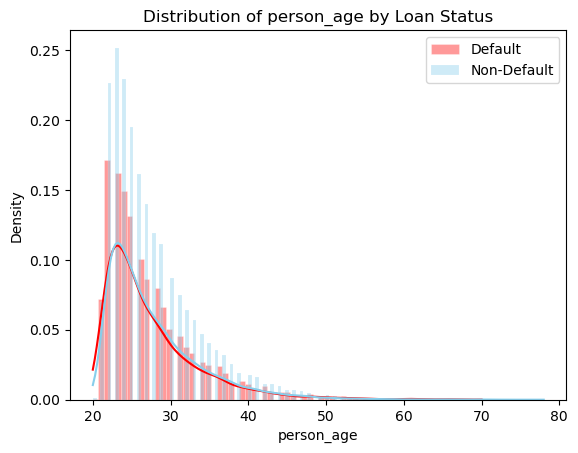

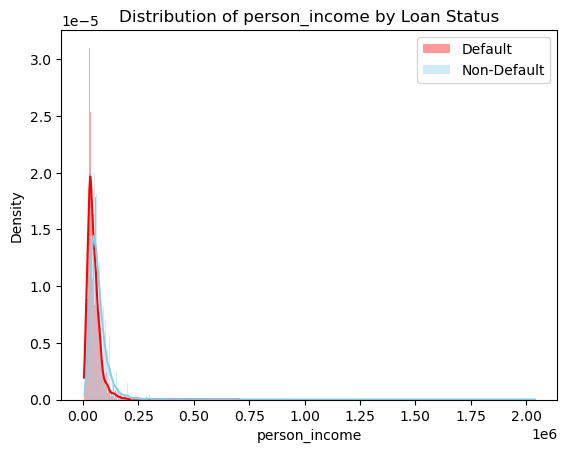

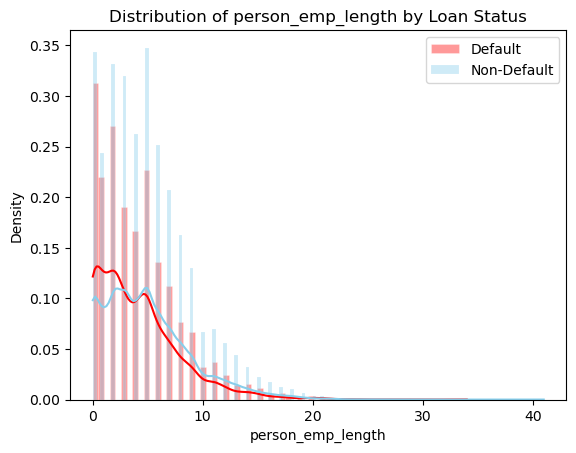

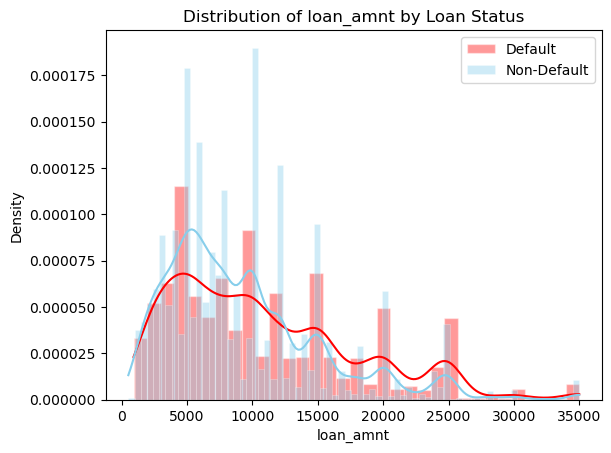

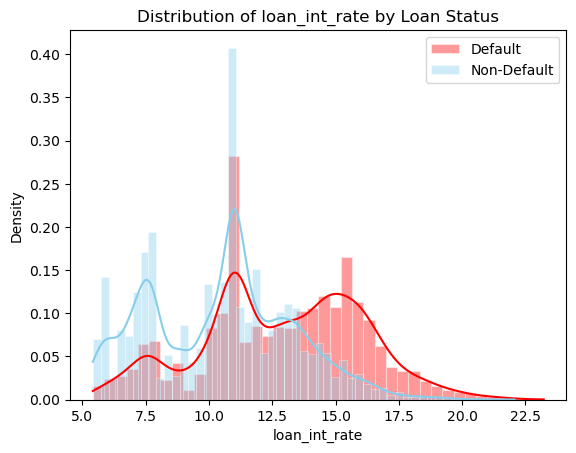

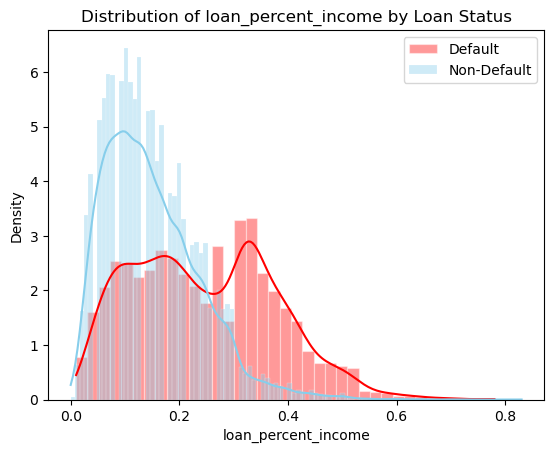

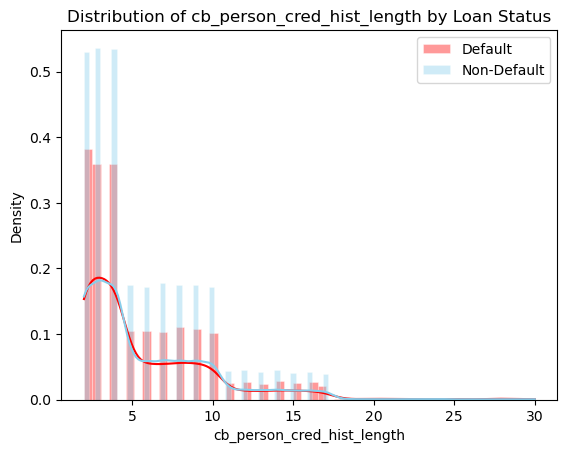

In [19]:
for col in num_col:
    sns.histplot(df[df.loan_status == 1][col], stat = 'density', kde = True, alpha=.4, edgecolor=(1, 1, 1, .4), label = 'Default', color='red')
    sns.histplot(df[df.loan_status == 0][col], stat = 'density', kde = True, alpha=.4, edgecolor=(1, 1, 1, .4), label = 'Non-Default',color='skyblue')
    plt.title(f'Distribution of {col} by Loan Status')
    plt.legend()
    plt.show()

In [62]:
label_encoder = LabelEncoder()
for i in cat_col:
    df[i] = label_encoder.fit_transform(df[i])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32406 entries, 1 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32406 non-null  int64  
 1   person_income               32406 non-null  int64  
 2   person_home_ownership       32406 non-null  int32  
 3   person_emp_length           32406 non-null  float64
 4   loan_intent                 32406 non-null  int32  
 5   loan_grade                  32406 non-null  int32  
 6   loan_amnt                   32406 non-null  int64  
 7   loan_int_rate               32406 non-null  float64
 8   loan_status                 32406 non-null  int64  
 9   loan_percent_income         32406 non-null  float64
 10  cb_person_default_on_file   32406 non-null  int32  
 11  cb_person_cred_hist_length  32406 non-null  int64  
dtypes: float64(3), int32(4), int64(5)
memory usage: 2.7 MB


In [63]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,2,5.0,1,1,1000,11.14,0,0.10,0,2
2,25,9600,0,1.0,3,2,5500,12.87,1,0.57,0,3
3,23,65500,3,4.0,3,2,35000,15.23,1,0.53,0,2
4,24,54400,3,8.0,3,2,35000,14.27,1,0.55,1,4
5,21,9900,2,2.0,5,0,2500,7.14,1,0.25,0,2


In [64]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('loan_status', axis=1), df['loan_status'],
                                        random_state=0,  test_size=0.3, shuffle=True)

In [65]:
target_names = ['Bình thường', 'Vỡ nợ']

In [66]:
models = {0 : 'Logsistic Regression',
          1 : 'KNN',
          2 : 'Decision Tree',
          3 : 'Extra Tress',
          4 : 'Random Forests',
          5 : 'Ada Boost',
          6 : 'Gradient Boosting',
          7 : 'Cat Boost'}

In [45]:
smotes = {0 : 'SMOTE',
          1 : 'BorderlineSMOTE',
          2 : 'SVMSMOTE',
          3 : 'ADASYN'}

In [67]:
for i, model in enumerate((LogisticRegression(random_state=42, max_iter=3000),
                KNeighborsClassifier(n_neighbors = 1),
                DecisionTreeClassifier(random_state=42, max_depth=6),
                ExtraTreesClassifier(n_estimators=100, random_state=42),
                RandomForestClassifier(max_depth=6, random_state=42),
                AdaBoostClassifier(n_estimators=100, random_state=42),
                GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0),
                CatBoostClassifier(iterations=2000, silent=True, learning_rate=0.01, depth=2))):
    clf = model.fit(X_train,y_train)
    y_test_pred = clf.predict(X_test)
    print('------------------------------------------------')
    print('Model: ', models[i])
    print(classification_report(y_test, y_test_pred, target_names=target_names))

------------------------------------------------
Model:  Logsistic Regression
               precision    recall  f1-score   support

Bình thường       0.81      0.98      0.89      7437
      Vỡ nợ       0.73      0.16      0.26      2019

     accuracy                           0.81      9456
    macro avg       0.77      0.57      0.58      9456
 weighted avg       0.79      0.81      0.76      9456

------------------------------------------------
Model:  KNN
               precision    recall  f1-score   support

Bình thường       0.88      0.89      0.89      7437
      Vỡ nợ       0.58      0.57      0.58      2019

     accuracy                           0.82      9456
    macro avg       0.73      0.73      0.73      9456
 weighted avg       0.82      0.82      0.82      9456

------------------------------------------------
Model:  Decision Tree
               precision    recall  f1-score   support

Bình thường       0.92      1.00      0.96      7437
      Vỡ nợ

#### Kết luận
- Lựa chọn mô hình Extra Tress

<Axes: >

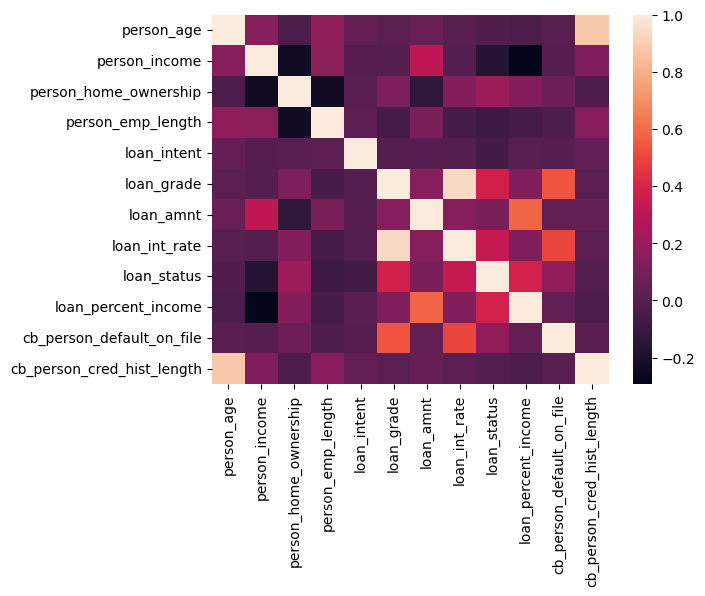

In [68]:
sns.heatmap(df.corr(numeric_only = True))

In [25]:
for i, model in enumerate((LogisticRegression(random_state=42, max_iter=3000),
                KNeighborsClassifier(n_neighbors = 1),
                DecisionTreeClassifier(random_state=42, max_depth=6),
                ExtraTreesClassifier(n_estimators=100, random_state=42),
                RandomForestClassifier(max_depth=6, random_state=42),
                AdaBoostClassifier(n_estimators=100, random_state=42),
                GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0),
                CatBoostClassifier(iterations=2000, silent=True, learning_rate=0.01, depth=2))):
    
    max_score = {'Bình thường': {'precision':0,
                             'recall':0,
                             'f1-score':0,
                             'support':0},
                 'Vỡ nợ': {'precision':0,
                             'recall':0,
                             'f1-score':0,
                             'support':0}
                }
    smote_sel = ''
    report = {}
    
    for j, sampler in enumerate((SMOTE(sampling_strategy = 1, random_state=0),
                KNeighborsClassifier(n_neighbors = 1),
                SVMSMOTE(sampling_strategy = 1, random_state=0),
                ADASYN(sampling_strategy = 1, random_state=0))):
        pipe_line = make_pipeline(sampler, model)
        pipe_line.fit(X_train, y_train)
        y_test_pred = pipe_line.predict(X_test) 
        print(classification_report(y_test, y_test_pred, target_names=target_names))
        
    print('------------------------------------------------')
    print('Model:', models[i], 'SMOTE method:', smote_sel)
    print(report)

------------------------------------------------
Model:  Logsistic Regression
               precision    recall  f1-score   support

Bình thường       0.81      0.98      0.89      7596
      Vỡ nợ       0.72      0.16      0.26      2126

     accuracy                           0.80      9722
    macro avg       0.76      0.57      0.58      9722
 weighted avg       0.79      0.80      0.75      9722

------------------------------------------------
Model:  KNN
               precision    recall  f1-score   support

Bình thường       0.88      0.89      0.89      7596
      Vỡ nợ       0.59      0.58      0.59      2126

     accuracy                           0.82      9722
    macro avg       0.74      0.73      0.74      9722
 weighted avg       0.82      0.82      0.82      9722

------------------------------------------------
Model:  Decision Tree
               precision    recall  f1-score   support

Bình thường       0.92      0.99      0.95      7596
      Vỡ nợ